In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf


In [9]:
import os

base_path = "../IRMAS-TrainingData/IRMAS-TrainingData/sax"
file = os.listdir(base_path)[0]  # first file
audio_path = f"{base_path}/{file}"

audio, sr = librosa.load(audio_path, sr=None, mono=False)
print("Loaded:", audio_path)


Loaded: ../IRMAS-TrainingData/IRMAS-TrainingData/sax/006__[sax][nod][cla]1686__1.wav


In [7]:
target_sr = 16000
audio_resampled = librosa.resample(audio_mono, orig_sr=sr, target_sr=target_sr)

print("Resampled length:", len(audio_resampled))
print("New sample rate:", target_sr)


Resampled length: 48000
New sample rate: 16000


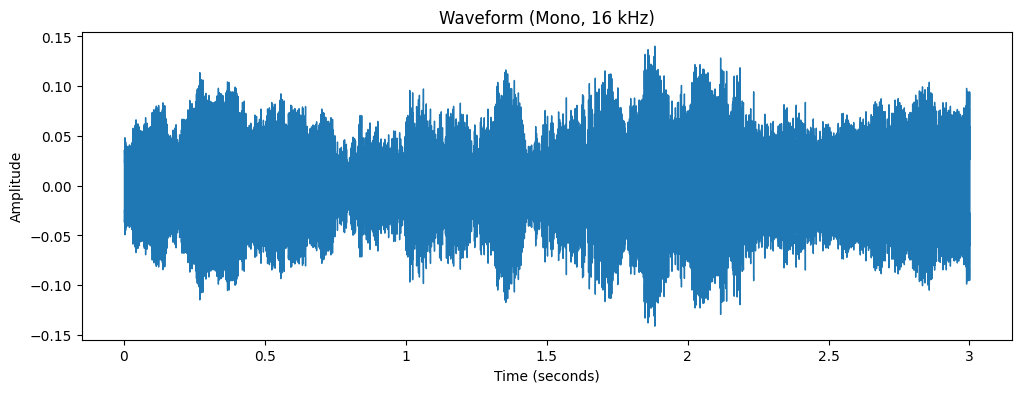

In [8]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio_resampled, sr=target_sr)
plt.title("Waveform (Mono, 16 kHz)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


In [10]:
import os
import librosa
import soundfile as sf

input_base = "../IRMAS-TrainingData/IRMAS-TrainingData"
output_base = "../IRMAS-TrainingData_preprocessed"

os.makedirs(output_base, exist_ok=True)


In [12]:
instruments = os.listdir(input_base)
print("Folders found:", instruments)


Folders found: ['cel', 'cla', 'flu', 'gac', 'gel', 'org', 'pia', 'sax', 'tru', 'vio', 'voi']


In [13]:
target_sr = 16000

for instr in instruments:
    input_folder = os.path.join(input_base, instr)
    output_folder = os.path.join(output_base, instr)

    os.makedirs(output_folder, exist_ok=True)

    print(f"\nProcessing instrument: {instr}")

    for file in os.listdir(input_folder):
        if file.endswith(".wav"):
            file_path = os.path.join(input_folder, file)

            try:
                # Load audio
                audio, sr = librosa.load(file_path, sr=None, mono=False)

                # Stereo → Mono
                if audio.ndim == 2:
                    audio = librosa.to_mono(audio)

                # Resample to 16 kHz
                audio = librosa.resample(audio, orig_sr=sr, target_sr=target_sr)

                # Save new file
                out_path = os.path.join(output_folder, file)
                sf.write(out_path, audio, target_sr)

            except Exception as e:
                print("Error processing:", file_path, "→", e)



Processing instrument: cel

Processing instrument: cla

Processing instrument: flu

Processing instrument: gac

Processing instrument: gel

Processing instrument: org

Processing instrument: pia

Processing instrument: sax

Processing instrument: tru

Processing instrument: vio

Processing instrument: voi


In [2]:
import os

input_base = "../IRMAS-TrainingData_preprocessed"
output_base = "../IRMAS-Spectrograms"

os.makedirs(output_base, exist_ok=True)


In [3]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

def create_mel_spectrogram(audio, sr, n_mels=128):
    S = librosa.feature.melspectrogram(
        y=audio, 
        sr=sr, 
        n_fft=2048, 
        hop_length=512, 
        n_mels=n_mels
    )
    S_db = librosa.power_to_db(S, ref=np.max)
    return S_db


In [4]:
import matplotlib.pyplot as plt

for instr in os.listdir(input_base):
    in_folder = os.path.join(input_base, instr)
    out_folder = os.path.join(output_base, instr)
    os.makedirs(out_folder, exist_ok=True)

    print(f"Generating spectrograms for: {instr}")

    for file in os.listdir(in_folder):
        if file.endswith(".wav"):
            try:
                file_path = os.path.join(in_folder, file)

                # Load audio
                audio, sr = librosa.load(file_path, sr=None)

                # Create mel spectrogram
                mel_spec = create_mel_spectrogram(audio, sr)

                # Save as PNG
                plt.figure(figsize=(2.5, 2.5))
                plt.axis("off")
                librosa.display.specshow(mel_spec, sr=sr, cmap="magma")
                
                out_path = os.path.join(out_folder, file.replace(".wav", ".png"))
                plt.savefig(out_path, bbox_inches='tight', pad_inches=0)
                plt.close()

            except Exception as e:
                print("Error:", file, e)


Generating spectrograms for: cel
Generating spectrograms for: cla
Generating spectrograms for: flu
Generating spectrograms for: gac
Generating spectrograms for: gel
Generating spectrograms for: org
Generating spectrograms for: pia
Generating spectrograms for: sax
Generating spectrograms for: tru
Generating spectrograms for: vio
Generating spectrograms for: voi


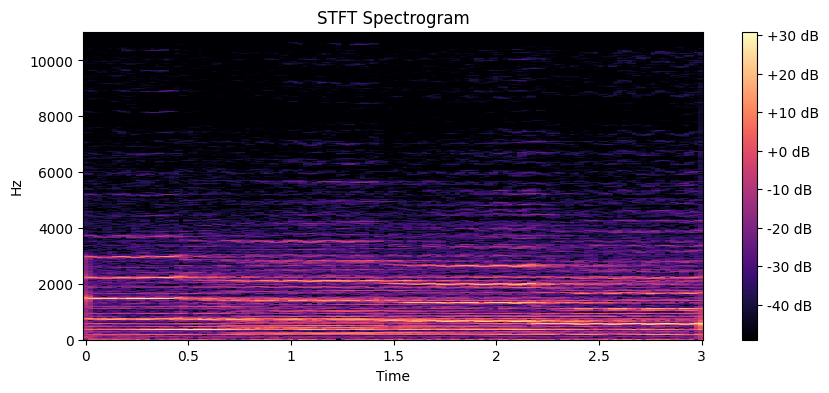

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

audio_path = "../IRMAS-TrainingData/sax/006__[sax][nod][cla]1686__1.wav"
audio, sr = librosa.load(audio_path)

# STFT spectrogram
stft = librosa.stft(audio)
stft_db = librosa.amplitude_to_db(abs(stft))

plt.figure(figsize=(10, 4))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='linear', cmap='magma')
plt.title("STFT Spectrogram")
plt.colorbar(format="%+2.f dB")
plt.show()


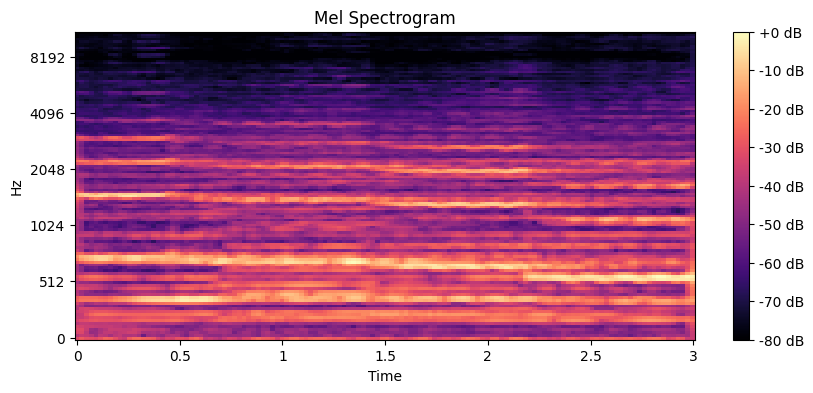

In [4]:
import numpy as np

mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128)
mel_db = librosa.power_to_db(mel_spec, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_db, sr=sr, x_axis="time", y_axis="mel", cmap='magma')
plt.title("Mel Spectrogram")
plt.colorbar(format="%+2.f dB")
plt.show()


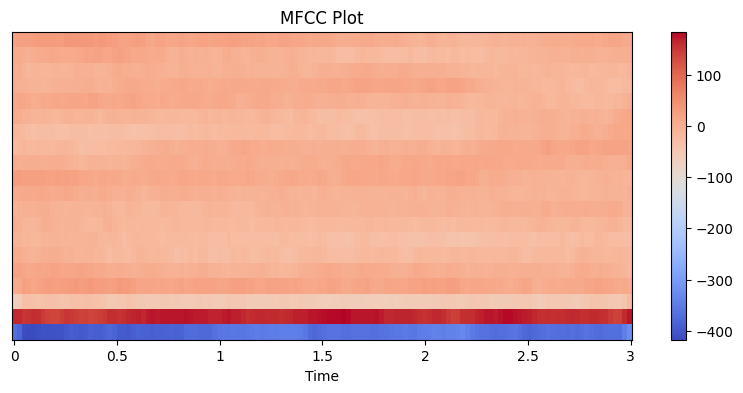

In [5]:
mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=20)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, sr=sr, x_axis="time", cmap='coolwarm')
plt.title("MFCC Plot")
plt.colorbar()
plt.show()
